In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Data exploration

Step 1: Load the given Banknote authentication dataset.

In [2]:
# load data

#train = pd.read_csv('C:/Users/Sambou Diao/Desktop/MOOC20/titanic/train.csv') #data load in computer 
mydata = pd.read_csv('data_banknote_authentication.txt', header=None)
mydata.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
malist = mydata.columns
malist = ("V1", "V2", "V3", "V4", "true_class")
mydata.columns = malist
mydata.columns
mydata.head()

,V1,V2,V3,V4,true_class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
banknote_aut_data = mydata.loc[:,['V1', 'V2', 'true_class']] # Good data
banknote_aut_data.head()

,V1,V2,true_class
0,3.62160,8.6661,0
1,4.54590,8.1674,0
2,3.86600,-2.6383,0
3,3.45660,9.5228,0
4,0.32924,-4.4552,0


In [6]:
banknote_aut_data.tail(8)

,V1,V2,true_class
1364,-2.83910,-6.63000,1
1365,-4.50460,-5.81260,1
1366,-2.41000,3.74330,1
1367,0.40614,1.34920,1
1368,-1.38870,-4.87730,1
1369,-3.75030,-13.45860,1
1370,-3.56370,-8.38270,1
1371,-2.54190,-0.65804,1


Step 2: Calculate statistical measures, e.g. mean and standard deviation.

##   Description univariée

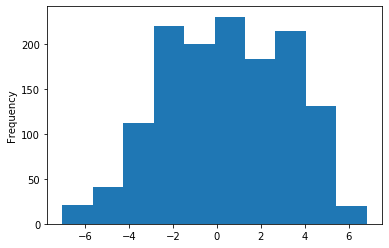

In [75]:
# description univariée
df  = banknote_aut_data
df.dtypes
df.describe()
#df["V1"].hist()
df["V1"].plot(kind="hist")
plt.savefig("histV1")

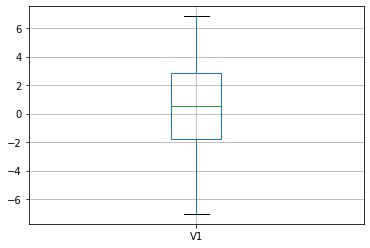

In [8]:
df.boxplot("V1")


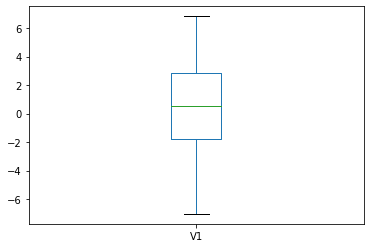

In [76]:
df["V1"].plot(kind="box")
plt.savefig("boxV1")

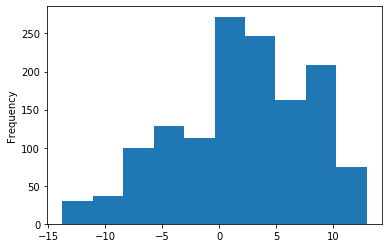

In [62]:

df["V2"].plot(kind="hist")
plt.savefig("histV2")

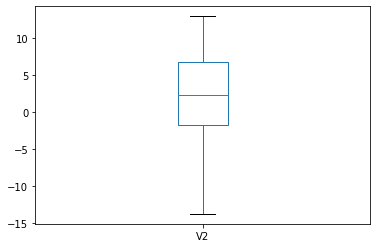

In [77]:
df["V2"].plot(kind="box")
plt.savefig("boxV2")

In [15]:
# qualitatif
banknote_aut_data["true_class"] = pd.Categorical(banknote_aut_data["true_class"],ordered=False)
# redéfinir les noms des modalités
#banknote_aut_data["Target"]=banknote_aut_data["Target"].cat.rename_categories(["Authentic=0","Fake=1"])
y_true = banknote_aut_data["true_class"]
banknote_aut_data.dtypes

df["true_class"].value_counts()

0    762
1    610
Name: true_class, dtype: int64

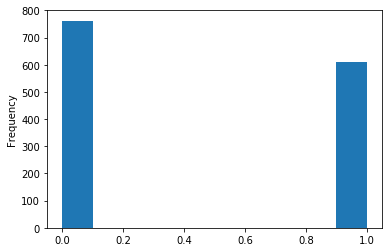

In [74]:
df["true_class"].plot(kind="hist")
#plt.savefig("histV2")

##   Description bivariée

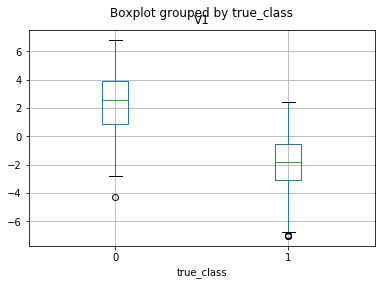

In [16]:
# Corrélationdf.corr()
# Nuage
#df.plot(kind="scatter",x="V1",y="V2")
# afficher une sélection
# df[df["Age"]>60][["Genre","Classe","Age","Surv"]]
# parallèle  boxplots
df.boxplot(column="V1",by="true_class")

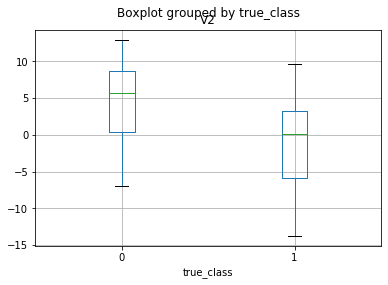

In [17]:
# parallèle  boxplots
df.boxplot(column="V2",by="true_class")

In [18]:
# count of null values
banknote_aut_data.isna().sum() # No null values

V1            0
V2            0
true_class    0
dtype: int64

In [19]:
#  description for data
banknote_aut_data.describe()

,V1,V2
count,1372.000000,1372.000000
mean,0.433735,1.922353
std,2.842763,5.869047
min,-7.042100,-13.773100
25%,-1.773000,-1.708200
50%,0.496180,2.319650
75%,2.821475,6.814625
max,6.824800,12.951600


In [20]:
# Mean per Target variable
banknote_aut_data.groupby('true_class').mean()

,V1,V2
true_class,,
0,2.276686,4.256627
1,-1.868443,-0.993576


In [21]:
# std per Target variable
banknote_aut_data.groupby('true_class').std()

,V1,V2
true_class,,
0,2.019348,5.138792
1,1.881183,5.404884


Step 3: Visualise your data as you consider fit.

In [22]:
banknote_aut_data = mydata.loc[:,['V1', 'V2', 'true_class']]
X = banknote_aut_data.loc[:,['V1', 'V2']] # characteristics variables
# domain standardisation: the data points will all lie
# between 0 (smallest one) and 1 (largest one)
X_cr = (X - X.min()) / (X.max() - X.min())

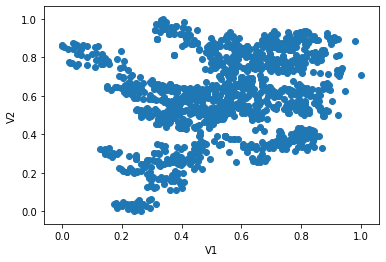

In [23]:
data_V1 = banknote_aut_data['V1']
data_V2 = banknote_aut_data['V2']
plt.xlabel('V1')
plt.ylabel('V2')
tar = banknote_aut_data['true_class']
#plt.scatter(data_V1, data_V2, s = tar*50, alpha = 0.15)
plt.scatter(X_cr.loc[:, 'V1'], X_cr.loc[:, 'V2'])
plt.savefig("figurekmeans1")

Step 4: Evaluate if the given dataset is suitable for the K-Means clustering task.

From the figure above, there seems to be a horizontal linear separator for our dataset. Two groups of data seem to be 
distinguished, so kmeans may be suitable in this case.
In addition, the mean of V2 is greater than that of V1. The data for V2 is more dispersed than that for V1.

Step 5: Write a short description of the dataset and your evaluation of its suitability for the K-Means clustering task

Note from the explorations, that V1 varies from -7(minimum value) to 6.8(maximum value) or V2 varies from -13.7(minimum value) to 12.9(maximum value). So it would be appropriate to  standardize the data before applying Kmeans. So kmens will be able to solve our problem well.

# Modelling kmeans

## Step 1: run K-means on the given dataset

In [24]:
banknote_aut_data = mydata.loc[:,['V1', 'V2', 'true_class']]
X = banknote_aut_data.loc[:,['V1', 'V2']] # characteristics variables
y_true = banknote_aut_data.loc[:,['true_class']] # Target variable

In [25]:

X_cr.describe()

,V1,V2
count,1372.000000,1372.000000
mean,0.539114,0.587301
std,0.205003,0.219611
min,0.000000,0.000000
25%,0.379977,0.451451
50%,0.543617,0.602168
75%,0.711304,0.770363
max,1.000000,1.000000


In [27]:
kmeans = KMeans(n_clusters=2) # 2 clusters: 0=genuine, 1= not genuine
kmeans.fit(X_cr)
pred_class = kmeans.predict(X_cr)

## Step 2: visualise the results

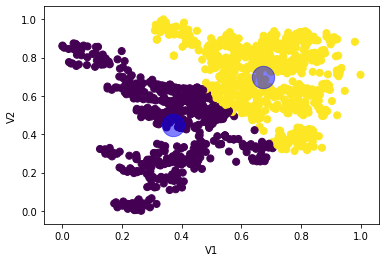

In [38]:
kmeans = KMeans(n_clusters=2) # 2 clusters: 0=genuine, 1= not genuine
kmeans.fit(X_cr)
pred_class = kmeans.predict(X_cr)
plt.scatter(X_cr.loc[:, 'V1'], X_cr.loc[:, 'V2'], c=y_kmeans, s=50, cmap='viridis')
plt.xlabel('V1')
plt.ylabel('V2')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=500, alpha=0.5);
plt.savefig("figurekmeans")

### We obtain the two classes, namely if a banknote is genuine or not. Kmeans divides into 2 depending on whether the values of V1 and V2 are all high or not.

## Step 3: re-run K-means several times and visualise the results

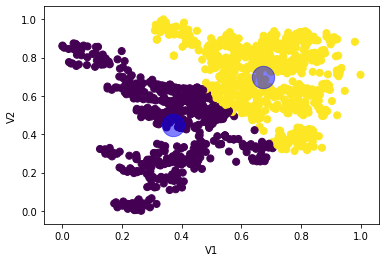

In [39]:
kmeans = KMeans(n_clusters=2) # 2 clusters: 0=genuine, 1= not genuine
kmeans.fit(X_cr)
pred_class = kmeans.labels_
#est=KMeans(n_clusters=10)est.fit(X)classe=est.labels_print(classe)
plt.scatter(X_cr.loc[:, 'V1'], X_cr.loc[:, 'V2'], c=y_kmeans, s=50, cmap='viridis')
plt.xlabel('V1')
plt.ylabel('V2')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=500, alpha=0.5);

#plt.text(4, -10, 'black' ,bbox=dict(facecolor='black', alpha=0.5))

In [47]:
class_true = banknote_aut_data["true_class"]
class_true

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: true_class, Length: 1372, dtype: int64

col_0         0    1
true_class          
0           675   87
1            89  521


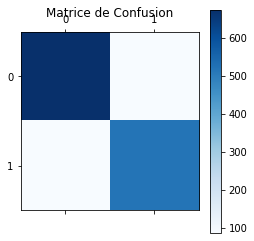

In [48]:
from sklearn.metrics import confusion_matrix
table=pd.crosstab(class_true,pred_class)
print(table)
plt.matshow(table, interpolation='none',cmap='Blues')
plt.title("Matrice de Confusion")
plt.colorbar()

[[675  87]
 [ 89 521]]


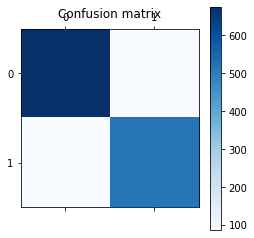

In [58]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(class_true,pred_class)
print(mat)
plt.matshow(mat, interpolation='none',cmap='Blues')
plt.title("Confusion matrix", ha='center', va='center')
plt.colorbar()
plt.savefig("Matrice")

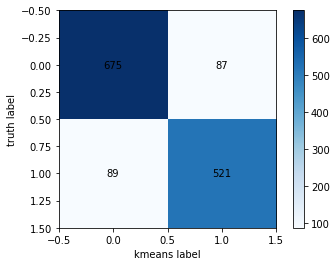

In [57]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(class_true,pred_class)
# Plot confusion matrix
plt.imshow(cm, interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center')
plt.xlabel("kmeans label")
plt.ylabel("truth label")
plt.colorbar()


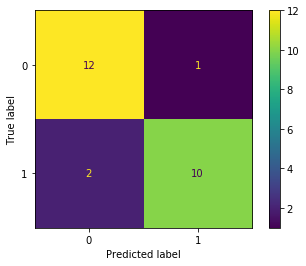

In [59]:

from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
Z, y = make_classification(random_state=0)
Z_train, Z_test, y_train, y_test = train_test_split(Z, y, random_state=0)
clf = SVC(random_state=0)
clf.fit(Z_train, y_train)
SVC(random_state=0)
plot_confusion_matrix(clf, Z_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP

In [53]:
plt.imshow?

## Step 4: compare the results: is the K-means algorithm stable?

K-means remains stable despite the permutation of the colors of the classes.

## Step 5: describe your results

We obtain the two classes, namely if a banknote is genuine or not. Kmeans divides into 2 depending on whether the values 
of V1 and V2 are all high or not.